<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR%2BkNN%2BNB%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)

In [4]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [5]:
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [5]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [20]:
#To get the coeffient
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2314
Method:                           MLE   Df Model:                           18
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.2182
Time:                        03:51:19   Log-Likelihood:                -771.08
converged:                       True   LL-Null:                       -986.27
Covariance Type:            nonrobust   LLR p-value:                 4.144e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.7729      1.278     -7.648      0.000     -12.277      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


A) Which variables are significantly diffrent than 0  at 5% significant level?

B)Among signicant variables, which one increases the probability of churn?

In [21]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.873
Precision: 0.625
Recall: 0.11278195488721804


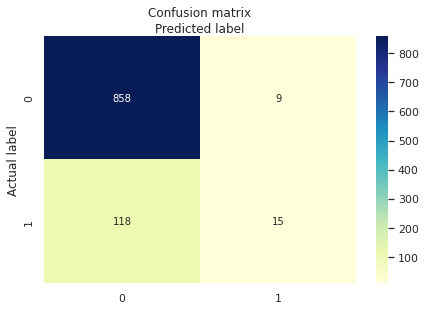

In [24]:
eval(y_test,y_pred)

K-Nearest Neighbour- k-NN

Accuracy: 0.868
Precision: 0.5072463768115942
Recall: 0.2631578947368421


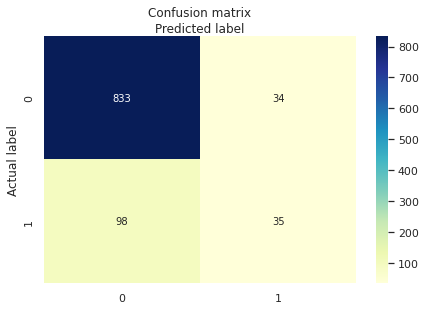

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
# fit the model with data
knn3.fit(X_train,y_train)

#
y_predKNN3=knn3.predict(X_test)
from sklearn import metrics

eval(y_test,y_predKNN3)

Choose k Based On CV

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_params = {"n_neighbors": range(2, 10)}

knn_grid = GridSearchCV(knn, knn_params, cv=3)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 5}

Accuracy: 0.875
Precision: 0.58
Recall: 0.21804511278195488


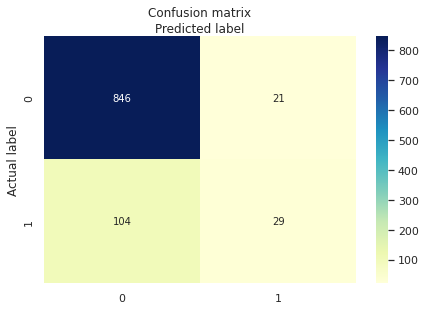

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knncv = KNeighborsClassifier(**knn_grid.best_params_)
# fit the model with data
knncv.fit(X_train,y_train)
#
y_predknncv=knncv.predict(X_test)
eval(y_test,y_predknncv)


# **Naive Bayes**

Accuracy: 0.863
Precision: 0.4864864864864865
Recall: 0.5413533834586466


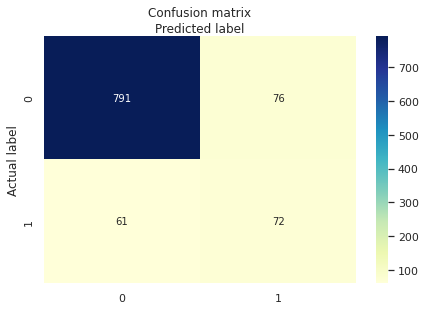

In [32]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
y_predNB=model.predict(X_test)
eval(y_test,y_predNB)

# **SVM with default parameters**

Accuracy: 0.867
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


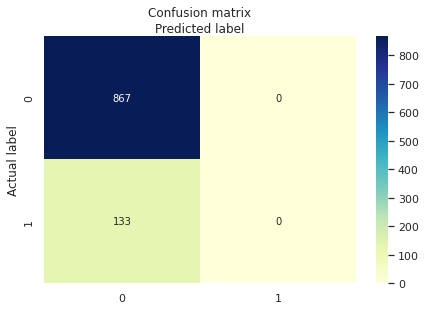

In [7]:
from sklearn.svm import SVC 
sv =SVC()
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

In [5]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 210 kB 51.2 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 150 kB 52.7 MB/s 
     |████████████████████████████████| 113 kB 54.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f182460a5944a854f9aa53a22baa4bbb55eed831224a48513d8028ca31510fec
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


Support Vector with Parameter Optimization

It takes too much time to optimize

In [7]:
from sklearn.svm import SVC 
import optuna as op
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train, y_train, test_size=0.3, random_state=17
) 
def objective(trial):

   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.1,3.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVC(kernel=kernel,degree=degree,gamma=gamma,C=c)
   model.fit(X_train2,y_train2)
   accuracy = model.score(X_test2,y_test2)
   return accuracy
#optuna study record
study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=10,n_jobs=-1)

[I 2022-04-01 04:31:32,241] A new study created in memory with name: no-name-2a0f692e-9d41-41b6-a330-d98c756e2b46
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  FutureWarning,
[I 2022-04-01 04:31:32,476] Trial 1 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 1.4626369315034748, 'gamma': 'auto', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2022-04-01 04:31:32,746] Trial 2 finished with value: 0.8528571428571429 and parameters: {'kernel': 'poly', 'C': 1.553590580158599, 'gamma': 'scale', 'degree': 2}. Best is trial 1 with value: 0.8528571428571429.
[I 2022-04-01 04:31:33,095] Trial 0 finished with value: 0.8528571428571429 and parameters: {'kernel': 'rbf', 'C': 1.1518064561982062, 'gamma': 'auto', 'degree': 1}. Best is trial 1 with value: 0.852857142857

Accuracy: 0.904
Precision: 0.6666666666666666
Recall: 0.556390977443609


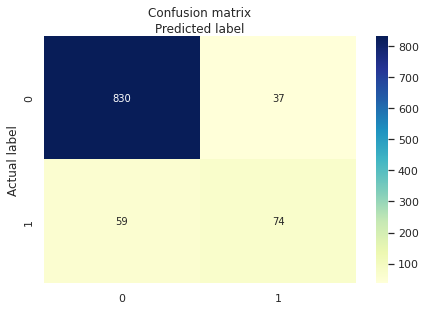

In [8]:
parameters={'kernel': 'poly', 'C': 0.8962395119767587, 'gamma': 'auto', 'degree': 2}
from sklearn.svm import SVC 
sv =SVC(**parameters)
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

## **Boosting**

[I 2022-04-01 05:28:57,544] A new study created in memory with name: no-name-448ab094-d0e9-4b57-b1dc-060eb7e0e1ce
[I 2022-04-01 05:28:57,993] Trial 0 finished with value: 0.9344219357072827 and parameters: {'max_depth': 10, 'max_features': 12, 'num_leaves': 212, 'feature_fraction': 0.5952396322575778, 'bagging_fraction': 0.8411233981967632, 'bagging_freq': 3, 'min_child_samples': 24}. Best is trial 0 with value: 0.9344219357072827.
[I 2022-04-01 05:28:58,260] Trial 1 finished with value: 0.9108478658607194 and parameters: {'max_depth': 14, 'max_features': 17, 'num_leaves': 248, 'feature_fraction': 0.5192838940496995, 'bagging_fraction': 0.7046602470614216, 'bagging_freq': 6, 'min_child_samples': 52}. Best is trial 0 with value: 0.9344219357072827.
[I 2022-04-01 05:28:58,503] Trial 2 finished with value: 0.9125616619189884 and parameters: {'max_depth': 11, 'max_features': 3, 'num_leaves': 51, 'feature_fraction': 0.8998933601800811, 'bagging_fraction': 0.8256999608935842, 'bagging_freq':

FrozenTrial(number=14, values=[0.945134815314764], datetime_start=datetime.datetime(2022, 4, 1, 5, 29, 6, 473508), datetime_complete=datetime.datetime(2022, 4, 1, 5, 29, 7, 134539), params={'max_depth': 4, 'max_features': 7, 'num_leaves': 87, 'feature_fraction': 0.6843520966127518, 'bagging_fraction': 0.8912441918373144, 'bagging_freq': 2, 'min_child_samples': 17}, distributions={'max_depth': IntUniformDistribution(high=18, low=2, step=1), 'max_features': IntUniformDistribution(high=18, low=2, step=1), 'num_leaves': IntUniformDistribution(high=256, low=2, step=1), 'feature_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_freq': IntUniformDistribution(high=7, low=1, step=1), 'min_child_samples': IntUniformDistribution(high=100, low=5, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=14, state=TrialState.COMPLETE, value=None)
Accuracy: 0.95
Precision: 0.9029126213592233
Recall: 0.699248120300

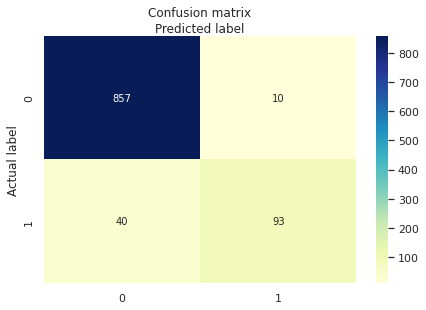

In [15]:
#Apply Best Model Parameter to Test Data
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    param = {
        "objective": "binary",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "max_dept" :trial.suggest_int("max_depth", 2, X_train.shape[1]),
        "max_features" : trial.suggest_int("max_features", 2,X_train.shape[1]),       
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    import lightgbm as lgb
    classifier_obj = lgb.LGBMClassifier(random_state=17,**param)

    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()
   
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=15)
    print(study.best_trial)
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=17,**study.best_params)
lgbm.fit(X_train, y_train)
# make predictions for test data
y_predlgbm = lgbm.predict(X_test)
eval(y_test, y_predlgbm)